Frequency scan.  Subtract off input phase, but no other corrections.

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
soc = TopSoc()

In [2]:
importlib.reload(Scan)
scan = Scan.Scan(soc)

In [3]:
fMixer = soc.fsIn/2/2
soc.set_mixer(fMixer)

1024.0

In [4]:
fTone = fMixer + soc.fsOut/np.pi + 10.123
#fTone = 500.3
print("fTone =",fTone)
inCh,inOffset = soc.inFreq2chOffset(fTone)
outCh,outOffset = soc.outFreq2chOffset(fTone)
print("fTone = %.6f MHz"%fTone)
print("  inCh=%4d    inOffset=%+.6f"%(inCh, inOffset))
print(" outCh=%4d   outOffset=%+.6f"%(outCh, outOffset))

fTone = 1360.0723234522018
fTone = 1360.072323 MHz
  inCh= 672    inOffset=+0.072323
 outCh= 168   outOffset=+0.072323


In [5]:
importlib.reload(Scan)
scan = Scan.Scan(soc)
freqs = np.array([fTone, fTone+12.345])
amplitudes = 0.9*np.ones(len(freqs))/len(freqs)
fis = np.sqrt(2)*np.arange(len(freqs))
bandwidth=0.00001
nf=100
decimation=2
nt=1
iBegin = 500
fscan = scan.fscan(freqs, amplitudes, fis, bandwidth, nf,
                  decimation, nt, iBegin=500, doProgress=True, retainPackets=True)


  0%|          | 0/100 [00:00<?, ?it/s]

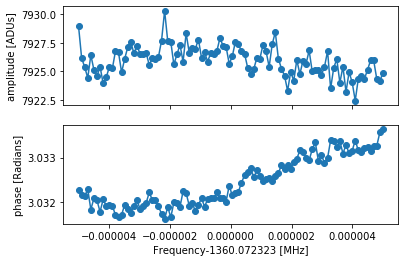

In [6]:
Scan.fscanPlot(fscan,0)